In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
pd.options.display.max_rows = 1000; pd.options.display.max_columns = 100;
sns.set_style('whitegrid')
import kaggle
from zipfile import ZipFile

Configure

In [2]:
train = pd.read_csv(ZipFile("house-prices-advanced-regression-techniques.zip").open("train.csv"))
test = pd.read_csv(ZipFile("house-prices-advanced-regression-techniques.zip").open("test.csv"))

Load data

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Preview head

In [4]:
numeric = [f for f in train.columns if train.dtypes[f] != 'object']
numeric.remove('SalePrice')
numeric.remove('Id')
categorical = [f for f in train.columns if train.dtypes[f] == 'object']

Separate numeric, categorical and target from each other.

# Explore Data
1460 ids in the training set. 81 variables in the dataset. 36 numeric variables (excluding Ids and Sale Price) and 43 categorical variables.

Numeric: 
'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
'2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
'MoSold', 'YrSold'

Categorical:
'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
'MiscFeature', 'SaleType', 'SaleCondition'

## Sale Price Variable
Sale Price is what we want to predict. Mean is around 180k with a couple of outliers.

In [5]:
y = train['SalePrice']
y.hist(bins=100)
plt.savefig('hopr-saleprice.svg')
plt.close();

![](hopr-saleprice-ant.svg)
See the shape of the target data.

In [6]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

See a bit of a right skew due to some outliers. Will it affect ML accuracy if we keep them in, not sure...

## Overall Quality
SalePrice increases as OverallQual increase, we know this. Because we are working with averages, a feature with outliers that are really far from the rest of the points will skew the our algorithm.

In [7]:
sns.boxplot(x=train['OverallQual'], y=train['SalePrice'], color='steelblue')
plt.savefig('hopr-overallquality.svg')
plt.close();

![](hopr-overallquality-ant.svg)
In this dataset, we found some but aren't far enough or numerous enough to become a threat to our averages.

## GrLivArea
GrLivArea is "Above Grade Living Area". There are many ways to measure a house but the most frequently measurement is to measure the area that is on the ground level. In the dataset, it has a strong relationship with SalePrice.

In [8]:
sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], ci=None
            , scatter_kws={'alpha':0.5}
            , line_kws={"color": "orange"})

plt.savefig('hopr-saleprice-grlivarea.svg')
plt.close();

![](hopr-saleprice-grlivarea-ant.svg)
The larger the house, the more you pay. Most of the houses follows this idea except for 2 houses priced at 523 and 1298.

## Correlation
Now we look at what features is more correlated with SalePrice.

In [9]:
g = (train[numeric].corrwith(train['SalePrice']).sort_values(ascending=False)
     .reset_index()).head(15)
g.columns = ['Features', 'Correlation']
g.style.bar(vmax=1, vmin=0)

,Features,Correlation
0,OverallQual,0.790982
1,GrLivArea,0.708624
2,GarageCars,0.640409
3,GarageArea,0.623431
4,TotalBsmtSF,0.613581
5,1stFlrSF,0.605852
6,FullBath,0.560664
7,TotRmsAbvGrd,0.533723
8,YearBuilt,0.522897
9,YearRemodAdd,0.507101


Overall Quality seems to be the most correlated matric to Sales Price.

In [10]:
matrix = train[['SalePrice'] + list(g['Features'])[:15]].corr()
np.fill_diagonal(matrix.values, 0)
sns.heatmap(matrix, linewidths=.01, linecolor='lightgrey', annot=True, cmap='Blues', vmin=.4, cbar=False);
plt.savefig('hopr-matrix.svg')
plt.close();

![](hopr-matrix-annot.svg)

Calculated correlation with the rest of the features. 
- GarageCars and GarageArea has a high correlation with each other.
- There are others, which I will keep in mind when I decide to combine them to create new combined features.

## Missing Data
We look at how much data we are missing.

In [11]:
missing = train.isnull().sum()
missing = missing[missing>0]
missing_tally = pd.DataFrame({
    'count': missing,
    'proportion': missing / len(train) * 100
})
missing_tally.sort_values(by='proportion', ascending=False).style.bar(vmax=100)

,count,proportion
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


19 features have missing data. Seems like missing data in PoolQC was used to indicate that there are no pools for those houses. Need to fill them up.

## Batch Exploring Features


In [37]:
# for c in categorical:
#     train[c] = train[c].fillna('NULL')

In [26]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

In [27]:
f = pd.melt(train, id_vars=['SalePrice'], value_vars=categorical)

In [49]:
categorical[:3]

['MSZoning', 'Street', 'Alley']

,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL
...,...,...,...
4375,175000,Alley,NaN
4376,210000,Alley,NaN
4377,266500,Alley,NaN
4378,142125,Alley,NaN


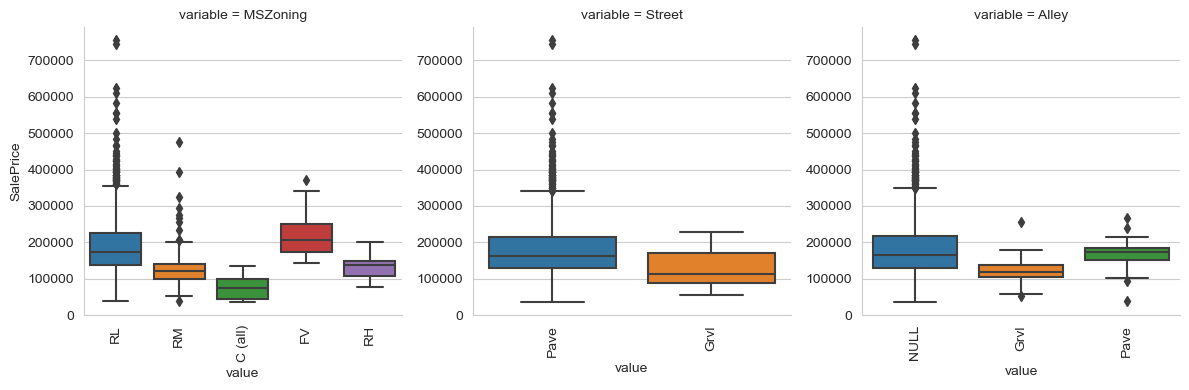

In [57]:
g = sns.FacetGrid(f.loc[f['variable'].isin(categorical[:3])].fillna('NULL'), col="variable"
                  , col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(boxplot, "value", "SalePrice")

- **Neighborhood Split Class**. CollgCr seems to be average. OldTown and Edwards are commonly cheap. NridgHt, NoRidge and StonBr are at the higher end.
- **Poor-Excellent Quality**. Some categories can be turned into numeric values.
- **SaleCondition and SaleType**. Partial SalesCondition and New SaleType seems to be both at higher value.


# Cleaning Area
This is where I clean the data.

In [ ]:
train['BsmtCond'].value_counts()

## Categorical Encoding

In [ ]:
cat_num = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual']
for c in cat_num:
    train[c] = train[c].replace({ 'Ex':5 , 'Gd':4 , 'TA':3, 'Fa':2, 'Po':1, 'NULL': 0})


# Machine Learning